# In-progress

### Header:

```1-based index, label x, label y, label z, prediction x, prediction y, prediction z, abs error x, abs error y, abs error z, total abs error```

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
images = np.load('/Users/cosmo/blocks-models/minecraft_single_block_images_grayscale_128x128.pkl').reshape(8080, 128, 128)

In [3]:
data = pandas.read_csv('labels_with_prediction.csv')

In [53]:
labels = np.load('/Users/cosmo/mldata/regression_1/input_position_only.pkl')

In [90]:
labels_df = pandas.DataFrame(labels)

In [120]:
def show_one(id):
    zero_based_idx = id - 1
    plt.imshow(images[zero_based_idx], interpolation='none', cmap=cm.Greys_r)
#     plt.xticks([])
#     plt.yticks([])
    plt.grid();

def show(ids):
    zero_based_idx = np.array(ids) - 1
    fig = plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k');
    n = len(zero_based_idx)
    for i in range(n):
        index_to_plot = zero_based_idx[i]
        image_to_plot = images[index_to_plot]
        
        y_offset = np.floor(i / 4)
        
        ax = fig.add_subplot(2, 4, i + 1);
        ax.imshow(image_to_plot, interpolation='none', cmap=cm.Greys_r)
        ax.set_xticks([])
        ax.set_yticks([])
        

### Largest error

In [5]:
largest = data.sort('total_error', ascending=False).head(8)

In [6]:
largest

,# id,label_x,label_y,label_z,prediction_x,prediction_y,prediction_z,error_x,error_y,error_z,total_error
684,238,-3,7,1,0.067613,2.938148,0.970549,3.067613,4.061852,0.029451,7.158915
285,6463,9,9,10,7.314279,7.944451,7.104027,1.685721,1.055549,2.895973,5.637243
126,5603,10,3,5,6.294417,3.143866,3.424530,3.705583,0.143866,1.575470,5.424919
624,1615,9,9,10,7.806724,8.298458,6.568084,1.193276,0.701542,3.431916,5.326734
269,294,-10,3,2,-5.398144,3.064697,1.438853,4.601856,0.064697,0.561147,5.227700
148,2498,-10,3,6,-5.656481,3.313647,5.513272,4.343519,0.313647,0.486728,5.143893
239,5751,-10,4,6,-6.936654,3.451992,4.534684,3.063346,0.548008,1.465316,5.076670
125,3840,10,3,4,5.925515,3.170111,3.178175,4.074485,0.170111,0.821825,5.066422


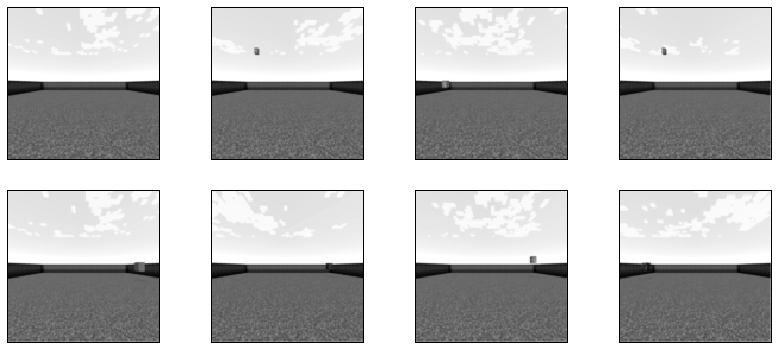

In [7]:
show(largest.ix[:, 0].values)

### Smallest error

In [8]:
smallest = data.sort('total_error', ascending=True).head(8)

In [9]:
smallest

,# id,label_x,label_y,label_z,prediction_x,prediction_y,prediction_z,error_x,error_y,error_z,total_error
49,1775,2,3,1,1.977428,2.942384,0.966286,0.022572,0.057616,0.033714,0.113902
228,3642,1,8,2,0.994123,8.112601,2.013187,0.005877,0.112601,0.013187,0.131665
596,2669,-7,4,7,-6.962932,3.876635,6.969528,0.037068,0.123365,0.030472,0.190904
699,2113,4,5,3,3.879065,4.995326,3.077187,0.120935,0.004674,0.077187,0.202796
535,5537,7,7,4,7.001158,7.164104,4.074669,0.001158,0.164104,0.074669,0.239931
35,1214,7,4,8,6.906479,4.099548,7.952592,0.093521,0.099548,0.047408,0.240477
245,3853,2,4,4,1.974327,4.108375,3.886765,0.025673,0.108375,0.113235,0.247282
558,1123,0,7,7,0.062608,7.074518,7.110343,0.062608,0.074518,0.110343,0.247469


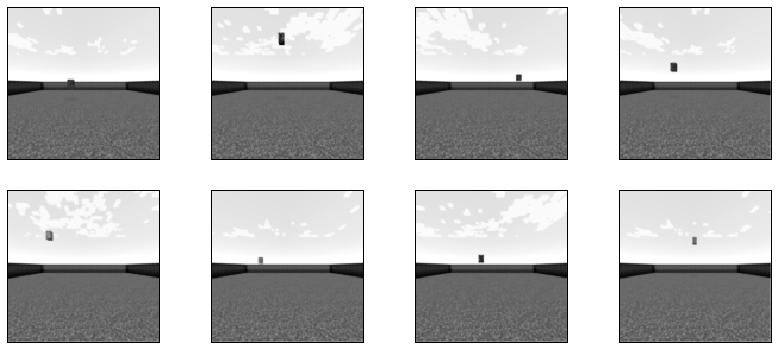

In [10]:
show(smallest.ix[:, 0].values)

### Analyze the errors

In [27]:
def count_by_tolerance(tol):
    correct = len(data[(data['error_x'] < tol) & (data['error_y'] < tol) & (data['error_z'] < tol)])
    total = len(data)
    percent = correct / total
    return correct, percent

In [28]:
count_by_tolerance(0.5)

(212, 0.2623762376237624)

In [29]:
count_by_tolerance(1.0)

(547, 0.676980198019802)

In [30]:
count_by_tolerance(2.0)

(766, 0.948019801980198)

### Examples of error magnitude

In [37]:
data[(data['error_x'] > 0.8) & (data['error_x'] < 1.2) & 
     (data['error_y'] > 0.8) & (data['error_y'] < 1.2) &
     (data['error_z'] > 0.8) & (data['error_z'] < 1.2)]

,# id,label_x,label_y,label_z,prediction_x,prediction_y,prediction_z,error_x,error_y,error_z,total_error
91,1157,-8,9,7,-6.959248,7.801933,7.880377,1.040752,1.198067,0.880377,3.119197
386,1304,-8,9,8,-6.963600,8.138178,8.974953,1.036400,0.861822,0.974953,2.873176
446,7777,1,9,8,1.803047,7.847413,7.087873,0.803047,1.152587,0.912127,2.867761
466,5859,-7,9,6,-6.176045,8.157771,4.930214,0.823955,0.842229,1.069786,2.735969


In [39]:
data.loc[386]

# id            1304.000000
label_x           -8.000000
label_y            9.000000
label_z            8.000000
prediction_x      -6.963600
prediction_y       8.138178
prediction_z       8.974953
error_x            1.036400
error_y            0.861822
error_z            0.974953
total_error        2.873176
Name: 386, dtype: float64

Now let's look at the nearest actual image to the predicted location.

* Actual: (-8, 9, 8)
* Predicted: (-7, 8, 9) 

In [89]:
np.where(labels == np.array([-7, 8, 9]))

(array([   2,   23,   44, ..., 8057, 8058, 8062]),
 array([0, 0, 0, ..., 1, 1, 0]))

In [96]:
labels_df.head(3)

,0,1,2
0,-9,3,0
1,-8,3,0
2,-7,3,0


In [106]:
labels_df[(labels_df[0] == -7) &
          (labels_df[1] ==  8) &
          (labels_df[2] ==  9)]

,0,1,2
1430,-7,8,9
3046,-7,8,9
4662,-7,8,9
6278,-7,8,9
7894,-7,8,9


The array indexing is 0-based, so the image index is one greater.

#### Visual interpretation of per-dimension prediction error of approximately 1

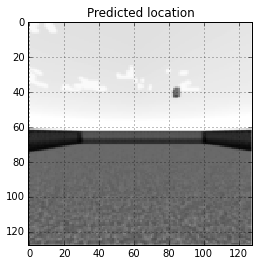

In [121]:
show_one(1431)
plt.title('Predicted location');

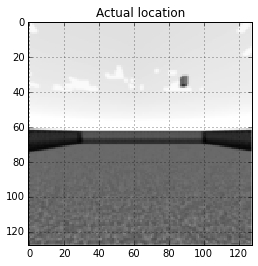

In [123]:
show_one(1304)
plt.title('Actual location');